In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy.stats import pearsonr
import statsmodels.api as sm

In [5]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [6]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [10]:
boston_df=boston_df.drop(columns=['Unnamed: 0'])

In [11]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


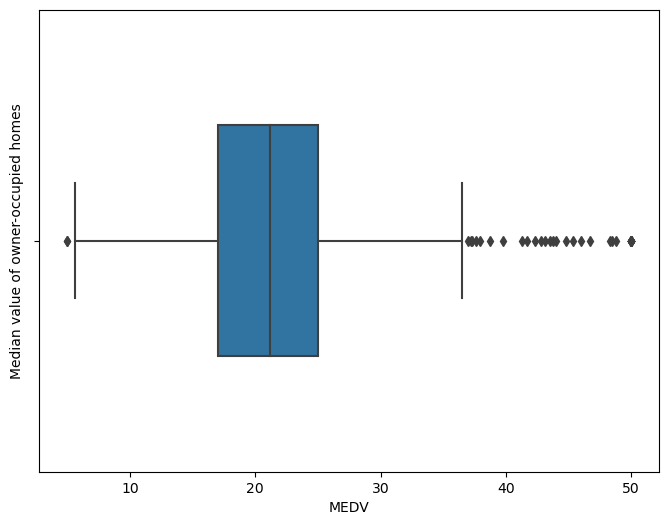

In [15]:
col = boston_df['MEDV']
plt.figure(figsize=(8, 6))
sns.boxplot(col, orient='v', width=0.5)
plt.ylabel('Median value of owner-occupied homes')
plt.show()

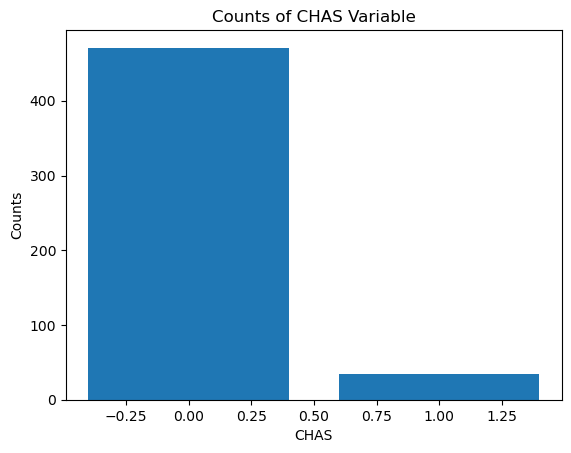

In [16]:
# Create a bar plot of the CHAS variable
chas_counts = boston_df['CHAS'].value_counts()
plt.bar(chas_counts.index, chas_counts.values)
# Add labels and title
plt.xlabel('CHAS')
plt.ylabel('Counts')
plt.title('Counts of CHAS Variable')
# Display the plot
plt.show()

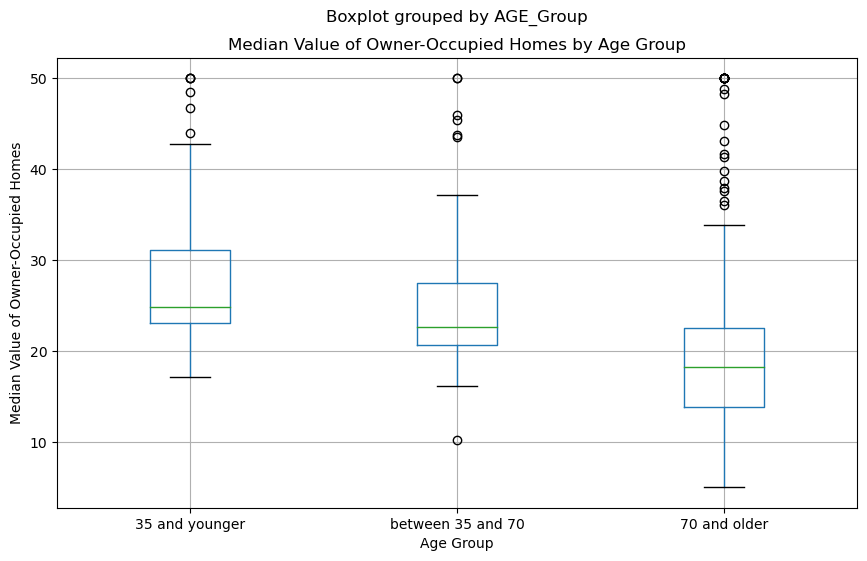

In [17]:
# create age groups
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, float('inf')], labels=['35 and younger', 'between 35 and 70', '70 and older'])

# create a boxplot
boston_df.boxplot(column=['MEDV'], by=['AGE_Group'], figsize=(10,6))

# set the title and axis labels
plt.title("Median Value of Owner-Occupied Homes by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Median Value of Owner-Occupied Homes")

# show the plot
plt.show()

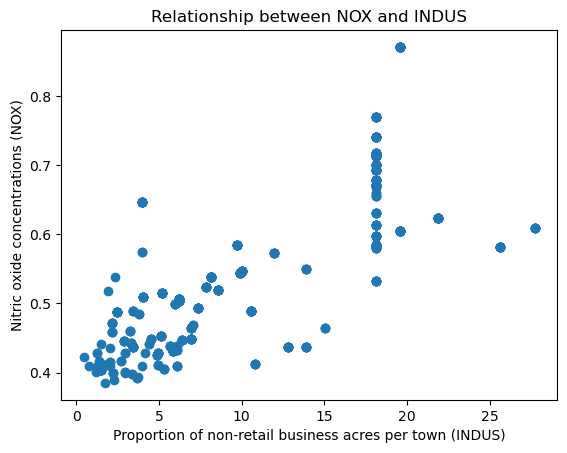

In [18]:
# Extract variables
nox = boston_df['NOX']
indus = boston_df['INDUS']

# Create scatter plot
plt.scatter(indus, nox)

# Add axis labels and title
plt.xlabel('Proportion of non-retail business acres per town (INDUS)')
plt.ylabel('Nitric oxide concentrations (NOX)')
plt.title('Relationship between NOX and INDUS')

# Display the plot
plt.show()

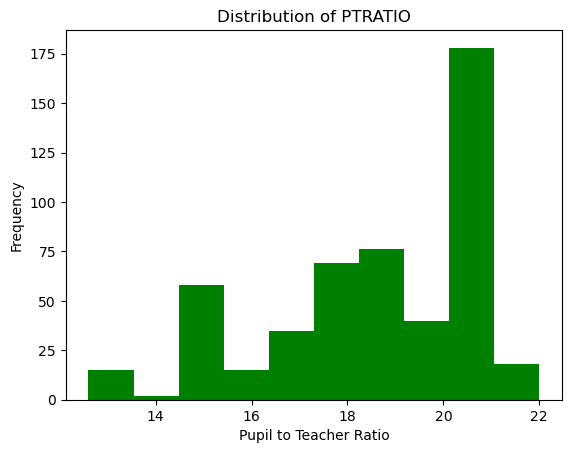

In [19]:
# extract PTRATIO column
ptratio = boston_df['PTRATIO']

# create histogram
plt.hist(ptratio, bins=10, color='green')

# add labels and title
plt.xlabel('Pupil to Teacher Ratio')
plt.ylabel('Frequency')
plt.title('Distribution of PTRATIO')

# display plot
plt.show()

In [28]:
boston_df[['CHAS0', 'CHAS1']] = pd.get_dummies(boston_df['CHAS'])

In [30]:
# Conduct two-sample t-test
t_stat, p_value = stats.ttest_ind(boston_df['CHAS0'], boston_df['CHAS1'])

# Set alpha level and determine significance
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in median value of houses bounded by the Charles river.")
else:
    print("There is no significant difference in median value of houses bounded by the Charles river.")


There is a significant difference in median value of houses bounded by the Charles river.


In [37]:
# Convert AGE to categorical variable
boston_df['AGE_cat'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['AGE1', 'AGE2', 'AGE3'])

# Fit the ANOVA model
model = ols('MEDV ~ C(AGE_cat)', data=boston_df).fit()

# Perform ANOVA and print the results
anova_table = anova_lm(model, typ=2)
print(anova_table)

# Check if p-value is less than 0.05
if p_value < 0.05:
    print("There is a significant difference in median values of houses for each proportion of owner-occupied units built prior to 1940.")
else:
    print("there is not a significant difference in median values of houses for each proportion of owner-occupied units built prior to 1940.")

                  sum_sq     df         F        PR(>F)
C(AGE_cat)   5401.731883    2.0  36.40765  1.710501e-15
Residual    37314.563532  503.0       NaN           NaN
There is a significant difference in median values of houses for each proportion of owner-occupied units built prior to 1940.


In [35]:
corr, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Output the results
print("Correlation Coefficient:", corr)
print("P-value:", p_value)

# Check if p-value is less than 0.05
if p_value < 0.05:
    print("There is a significant correlation between NOX and INDUS")
else:
    print("There is no significant correlation between NOX and INDUS")

Correlation Coefficient: 0.763651446920915
P-value: 7.913361061239593e-98
There is a significant correlation between NOX and INDUS


In [39]:
X = boston_df[['DIS']] # Weighted distance to employment centers
y = boston_df[['MEDV']] # Median value of owner-occupied homes

# Add a constant term to the independent variable
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 02 Apr 2023   Prob (F-statistic):           1.21e-08
Time:                        19:40:05   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0